In [6]:

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
#import seaborn as sns
from pylab import rcParams
#sns.set()
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
np.random.seed(42)

In [7]:
norm_rv = stats.norm(loc=30, scale=5)
samples = np.trunc(norm_rv.rvs(365))
samples[:30]

array([32., 29., 33., 37., 28., 28., 37., 33., 27., 32., 27., 27., 31.,
       20., 21., 27., 24., 31., 25., 22., 37., 28., 30., 22., 27., 30.,
       24., 31., 26., 28.])

In [8]:
samples.mean(), samples.std()

(29.52054794520548, 4.77410133275075)

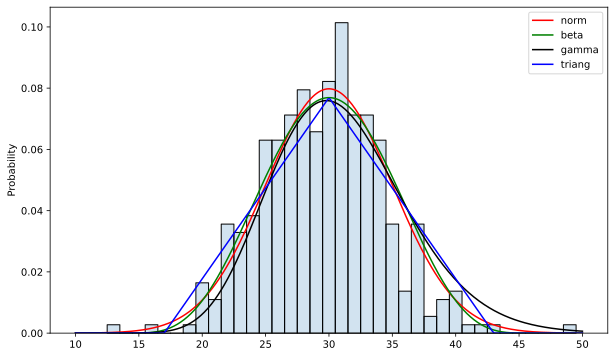

In [9]:
norm_rv = stats.norm(loc=30, scale=5)
beta_rv = stats.beta(a=5, b=5, loc=14, scale=32)
gamma_rv = stats.gamma(a = 20, loc = 7, scale=1.2)
tri_rv = stats.triang(c=0.5, loc=17, scale=26)

x = np.linspace(10, 50, 300)

sns.lineplot(x = x, y = norm_rv.pdf(x), color='r', label='norm')
sns.lineplot(x = x, y = beta_rv.pdf(x), color='g', label='beta')
sns.lineplot(x = x, y = gamma_rv.pdf(x), color='k', label='gamma')
sns.lineplot(x = x, y = tri_rv.pdf(x), color='b', label='triang')

sns.histplot(x=samples, discrete=True, stat='probability',
             alpha=0.2);

In [10]:
unif_rv = stats.uniform(loc=0, scale=4)
unif_rv.rvs()

0.8943833540778106

In [11]:
unif_rv.rvs(size=3)

array([3.85289016, 0.0486179 , 3.87951531])

<AxesSubplot:ylabel='Count'>

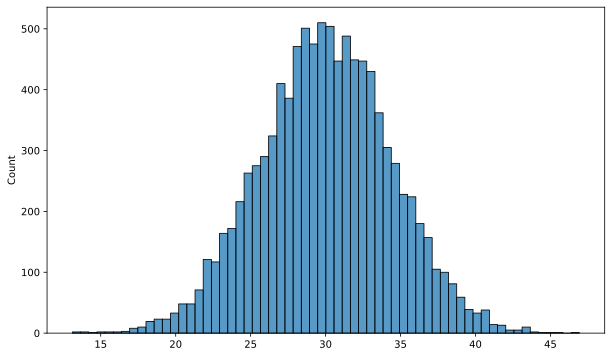

In [12]:
Y_samples = [unif_rv.rvs(size=15).sum() for i in range(10000)]
sns.histplot(x=Y_samples)

In [13]:
N = 5000
t_data = norm_rv.rvs(N)
t_data[(25 < t_data) & (t_data < 35)].size/N

0.7008

In [14]:
t_data[t_data > 40].size/N

0.0248

<AxesSubplot:ylabel='Probability'>

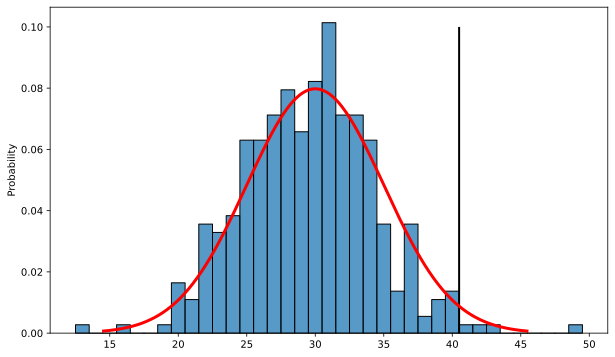

In [18]:
fig, ax = plt.subplots()
x = np.linspace(norm_rv.ppf(0.001), norm_rv.ppf(0.999), 200)
ax.vlines(40.5, 0, 0.1, color='k', lw=2)
sns.lineplot(x=x, y=norm_rv.pdf(x), color='r', lw=3)
sns.histplot(x=samples, stat='probability', discrete=True)

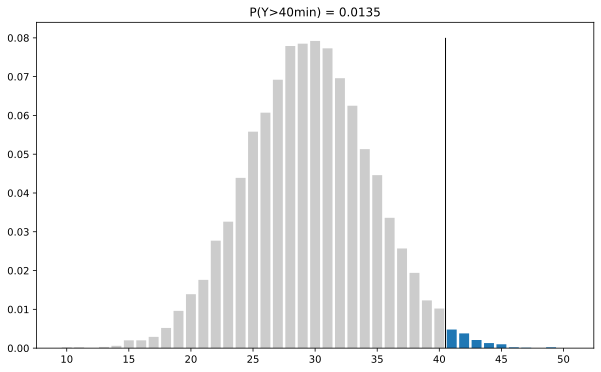

In [19]:
np.random.seed(42)
N = 10000
values = np.trunc(norm_rv.rvs(N))

fig, ax = plt.subplots()
v_le_41 = np.histogram(values, np.arange(9.5, 41.5))
v_ge_40 = np.histogram(values, np.arange(40.5, 51.5))
ax.bar(np.arange(10, 41), v_le_41[0]/N, color='0.8')
ax.bar(np.arange(41, 51), v_ge_40[0]/N)
p = np.sum(v_ge_40[0]/N)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.vlines(40.5, 0, 0.08, color='k', lw=1);

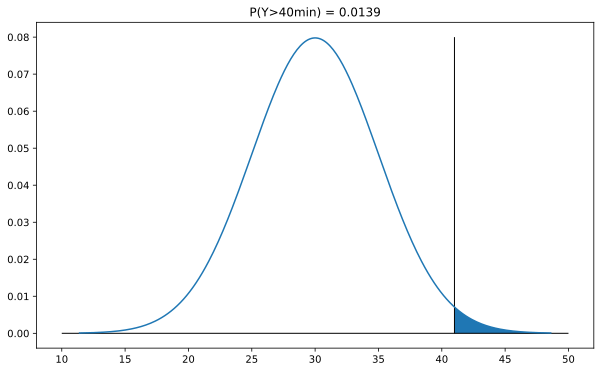

In [23]:
fig, ax = plt.subplots()

x = np.linspace(norm_rv.ppf(0.0001), norm_rv.ppf(0.9999), 300)
ax.plot(x, norm_rv.pdf(x))

ax.fill_between(x[x>41], norm_rv.pdf(x[x>41]))
p = 1 - norm_rv.cdf(41)
ax.set_title('P(Y>40min) = {:.3}'.format(p))
ax.hlines(0, 10, 50, lw=1, color='k')
ax.vlines(41, 0, 0.08, color='k', lw=1);